## Projeto Matplotlib - Categorização salarial dos campos da ciência de dados

    Salários de diferentes campos da ciência de dados no domínio da ciência de dados
    Dicionário de dados:

  - Ano de Trabalho: O ano em que o salário foi pago ( 2020, 2021, 2022)
  - Designação: O papel desempenhado durante o ano
  - Experiência: O nível de experiência no trabalho durante o ano.
     
      [ PT - Nível de entrada / Júnior, MI - Nível médio /   Intermediário, SE - Nível sênior / Especialista, EX - Nível executivo / Diretor ]
      
  - Situação Laboral:	O tipo de emprego para a função.
     
      [ PT - Part time, FT - Full time, CT - Contract, FL - Freelance ]
      
  - Salário em rúpias: O valor total do salário bruto pago.
  - Localização do funcionário: O principal país de residência do empregado durante o ano de trabalho como um código de país ISO 3166. ( PFB Link para o código de país ISO 3166 )
  - Localização da empresa: O país da sede ou sucursal contratante do empregador.
  - Tamanho da empresa: O número médio de pessoas que trabalharam para a empresa durante o ano.
      
      [ S(pequeno) - Menos de 50 trabalhadores, M (médio) - 50 a 250 trabalhadores, L (grande) - Mais de 250 trabalhadores ]
      
  - Relação de trabalho remoto: A quantidade total de trabalho feito remotamente.
      
      [ 0 - Sem trabalho remoto (menos de 20%), 50 - Parcialmente remoto, 100 - totalmente remoto (mais de 80%) ]
        
        
- https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

# Informe o nome dos participantes do trabalho:
### Nome aluno 1: João Victor Alves de Meira
### Nome aluno 2: Thomas Yoshihiro Kofuji

## Importar as bibliotecas necesssárias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud

 ## Importar a base de dados e visualizar as 15 primeiras linhas

In [4]:
df = pd.read_csv("/content/sample_data/Data_Science_Fields_Salary_Categorization.csv")
df.head(15)

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
5,6,2020,Data Analyst,EN,FT,"5,729,004.00",US,US,L,100
6,7,2020,Lead Data Scientist,SE,FT,"15,118,205.00",US,US,S,100
7,8,2020,Data Scientist,MI,FT,"2,843,416.00",HU,HU,L,50
8,9,2020,Business Data Analyst,MI,FT,"10,741,883.00",US,US,L,100
9,10,2020,Lead Data Engineer,SE,FT,"9,946,188.00",NZ,NZ,S,50


## Traduzir o nome das colunas e renomeá-las

In [5]:
nome_colunas = {
    'Unnamed: 0' : 'Sem Nome',
    'Working_Year': 'Ano de Trabalho',
    'Designation': 'Designação',
    'Experience': 'Experiência',
    'Employment_Status': 'Situação Laboral',
    'Salary_In_Rupees': 'Salário em Rupia',
    'Employee_Location': 'Localização do funcionário',
    'Company_Location': 'Localização da empresa',
    'Company_Size': 'Tamanho da empresa',
    'Remote_Working_Ratio': 'Relação de trabalho remoto'
}

df = df.rename(columns=nome_colunas)

## Verificar os domínios dos dados e se há valores nulos

In [6]:
df.info()

df[df.isna().any(axis = 1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sem Nome                    607 non-null    int64 
 1   Ano de Trabalho             607 non-null    int64 
 2   Designação                  607 non-null    object
 3   Experiência                 607 non-null    object
 4   Situação Laboral            607 non-null    object
 5   Salário em Rupia            607 non-null    object
 6   Localização do funcionário  607 non-null    object
 7   Localização da empresa      607 non-null    object
 8   Tamanho da empresa          607 non-null    object
 9   Relação de trabalho remoto  607 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


,Sem Nome,Ano de Trabalho,Designação,Experiência,Situação Laboral,Salário em Rupia,Localização do funcionário,Localização da empresa,Tamanho da empresa,Relação de trabalho remoto


## Corrigir os domínios dos dados

In [7]:
df['Salário em Rupia'] = df['Salário em Rupia'].str.replace(',','').astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sem Nome                    607 non-null    int64  
 1   Ano de Trabalho             607 non-null    int64  
 2   Designação                  607 non-null    object 
 3   Experiência                 607 non-null    object 
 4   Situação Laboral            607 non-null    object 
 5   Salário em Rupia            607 non-null    float64
 6   Localização do funcionário  607 non-null    object 
 7   Localização da empresa      607 non-null    object 
 8   Tamanho da empresa          607 non-null    object 
 9   Relação de trabalho remoto  607 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 47.5+ KB


## Excluir colunas desnecessárias

In [8]:
df = df.drop(columns=['Sem Nome'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ano de Trabalho             607 non-null    int64  
 1   Designação                  607 non-null    object 
 2   Experiência                 607 non-null    object 
 3   Situação Laboral            607 non-null    object 
 4   Salário em Rupia            607 non-null    float64
 5   Localização do funcionário  607 non-null    object 
 6   Localização da empresa      607 non-null    object 
 7   Tamanho da empresa          607 non-null    object 
 8   Relação de trabalho remoto  607 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB


## Verificar se há tuplas duplicadas na base

In [9]:
print(f"antes: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"depois: {df.duplicated().sum()}")

df.info()

antes: 42
depois: 0
<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ano de Trabalho             565 non-null    int64  
 1   Designação                  565 non-null    object 
 2   Experiência                 565 non-null    object 
 3   Situação Laboral            565 non-null    object 
 4   Salário em Rupia            565 non-null    float64
 5   Localização do funcionário  565 non-null    object 
 6   Localização da empresa      565 non-null    object 
 7   Tamanho da empresa          565 non-null    object 
 8   Relação de trabalho remoto  565 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 44.1+ KB


## Identificas as colunas que são categóricas (nominais ou ordinais), e definí-las como domínio category (ordenada ou não).

In [10]:
# Colunas nominais
colunas_nominais = ['Designação', 'Situação Laboral']

# Colunas ordinais com suas respectivas categorias e ordens
colunas_ordinais = {
    'Experiência': ['EN', 'MI', 'SE', 'EX'],
    'Tamanho da empresa': ['S', 'M', 'L']
}

# Convertendo para 'category'
for coluna in colunas_nominais:
    df[coluna] = pd.Categorical(df[coluna])

for coluna, categorias in colunas_ordinais.items():
    df[coluna] = pd.Categorical(df[coluna], categories=categorias, ordered=True)

# Verificando o resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Ano de Trabalho             565 non-null    int64   
 1   Designação                  565 non-null    category
 2   Experiência                 565 non-null    category
 3   Situação Laboral            565 non-null    category
 4   Salário em Rupia            565 non-null    float64 
 5   Localização do funcionário  565 non-null    object  
 6   Localização da empresa      565 non-null    object  
 7   Tamanho da empresa          565 non-null    category
 8   Relação de trabalho remoto  565 non-null    int64   
dtypes: category(4), float64(1), int64(2), object(2)
memory usage: 31.7+ KB


## Verificar os dados estatísticos da base, dados numéricos e não numéricos

In [11]:
# Mudando a opção de visualização dos valores
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
df.describe()


,Ano de Trabalho,Salário em Rupia,Relação de trabalho remoto
count,565.00,565.00,565.00
mean,2021.36,8801209.79,69.91
std,0.70,5751339.40,40.90
min,2020.00,227489.00,0.00
25%,2021.00,4834404.00,50.00
50%,2021.00,7956950.00,100.00
75%,2022.00,11935425.00,100.00
max,2022.00,47741700.00,100.00


In [12]:
df.describe(exclude = 'number')

,Designação,Experiência,Situação Laboral,Localização do funcionário,Localização da empresa,Tamanho da empresa
count,565,565,565,565,565,565
unique,50,4,4,57,50,3
top,Data Scientist,SE,FT,US,US,M
freq,130,243,546,295,318,290


## Agrupar as médias Salariais por Designação

In [13]:
# Agrupar as médias Salariais por Designação
media_salarial_por_designacao = df.groupby('Designação')['Salário em Rupia'].mean()

# Exibir o resultado
media_salarial_por_designacao

<ipython-input-13-fb82b4590bd0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salarial_por_designacao = df.groupby('Designação')['Salário em Rupia'].mean()


,Salário em Rupia
Designação,
3D Computer Vision Researcher,430391.00
AI Scientist,5262374.43
Analytics Engineer,13924662.75
Applied Data Scientist,13976780.80
Applied Machine Learning Scientist,11304339.75
BI Data Analyst,5948231.33
Big Data Architect,7933318.00
Big Data Engineer,4135545.25
Business Data Analyst,6102280.60


## Agrupar a soma Salarial por ano e por Experiência

In [14]:
# Agrupa por ano e experiência e soma os salários
salario_por_ano_experiencia = df.groupby(['Ano de Trabalho', 'Experiência'])['Salário em Rupia'].sum()

# Exibe o resultado
salario_por_ano_experiencia

<ipython-input-14-06c9e0b6cccb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salario_por_ano_experiencia = df.groupby(['Ano de Trabalho', 'Experiência'])['Salário em Rupia'].sum()


Ano de Trabalho  Experiência
2020             EN             101289746.00
                 MI             218848115.00
                 SE             196562844.00
                 EX              32212360.00
2021             EN             221024022.00
                 MI             589082772.00
                 SE             695050492.00
                 EX             195842819.00
2022             EN             109319901.00
                 MI             645083232.00
                 SE            1783918761.00
                 EX             184448468.00
Name: Salário em Rupia, dtype: float64

## Plotar a média salarial em um gráfico separando em dois subplots com 1 linha 2 colunas:
-  No primeiro apresentar a média salarial por tipo de experiência para o ano de 2020
-  No segundo apresentar a média salarial por tipo de experiência para o ano de 2022

<ipython-input-15-351121b445c9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salarial_2020 = df_2020.groupby('Experiência')['Salário em Rupia'].mean().reset_index()
<ipython-input-15-351121b445c9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salarial_2022 = df_2022.groupby('Experiência')['Salário em Rupia'].mean().reset_index()


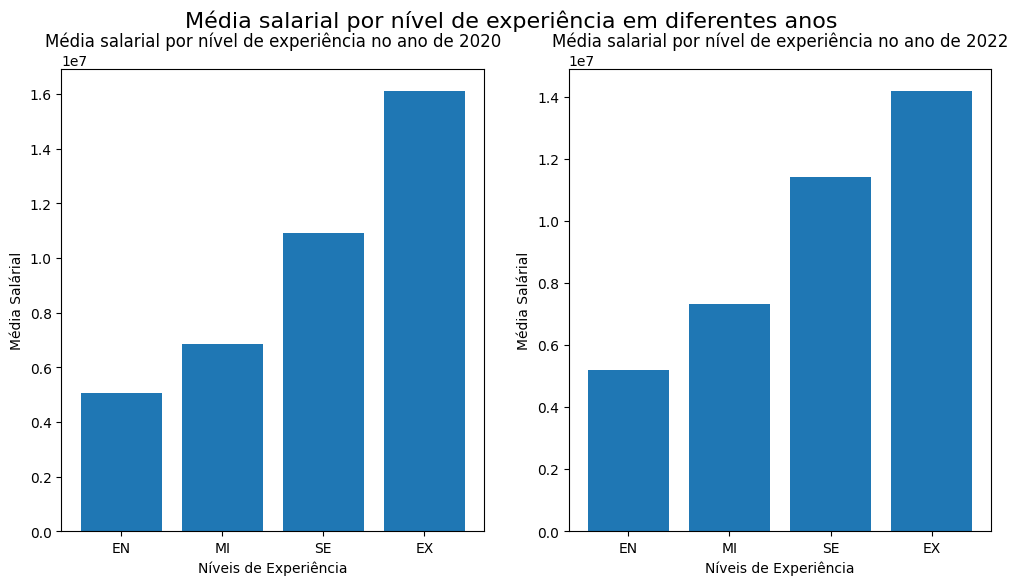

In [15]:
# Filtrando os dados para os anos 2020 e 2022
df_2020 = df[df['Ano de Trabalho'] == 2020]
df_2022 = df[df['Ano de Trabalho'] == 2022]

# Calculando a média salarial por experiência para cada ano
media_salarial_2020 = df_2020.groupby('Experiência')['Salário em Rupia'].mean().reset_index()

media_salarial_2022 = df_2022.groupby('Experiência')['Salário em Rupia'].mean().reset_index()

# Criando a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

axes[0].bar(media_salarial_2020['Experiência'], media_salarial_2020['Salário em Rupia'])
axes[0].set_xlabel('Níveis de Experiência')
axes[0].set_ylabel('Média Salárial')
axes[0].set_title('Média salarial por nível de experiência no ano de 2020')

axes[1].bar(media_salarial_2022['Experiência'], media_salarial_2022['Salário em Rupia'])
axes[1].set_xlabel('Níveis de Experiência')
axes[1].set_ylabel('Média Salárial')
axes[1].set_title('Média salarial por nível de experiência no ano de 2022')

fig.suptitle('Média salarial por nível de experiência em diferentes anos', fontsize=16)
plt.show()

## Melhorando a visualização
- Para aumentar o tamanho do gráfico podemos usar o `figsize=(x,y)`
- Se quisermos mudar a proporção dos gráficos, podemos usar o `gridspec_kw={'height_ratios': []}`

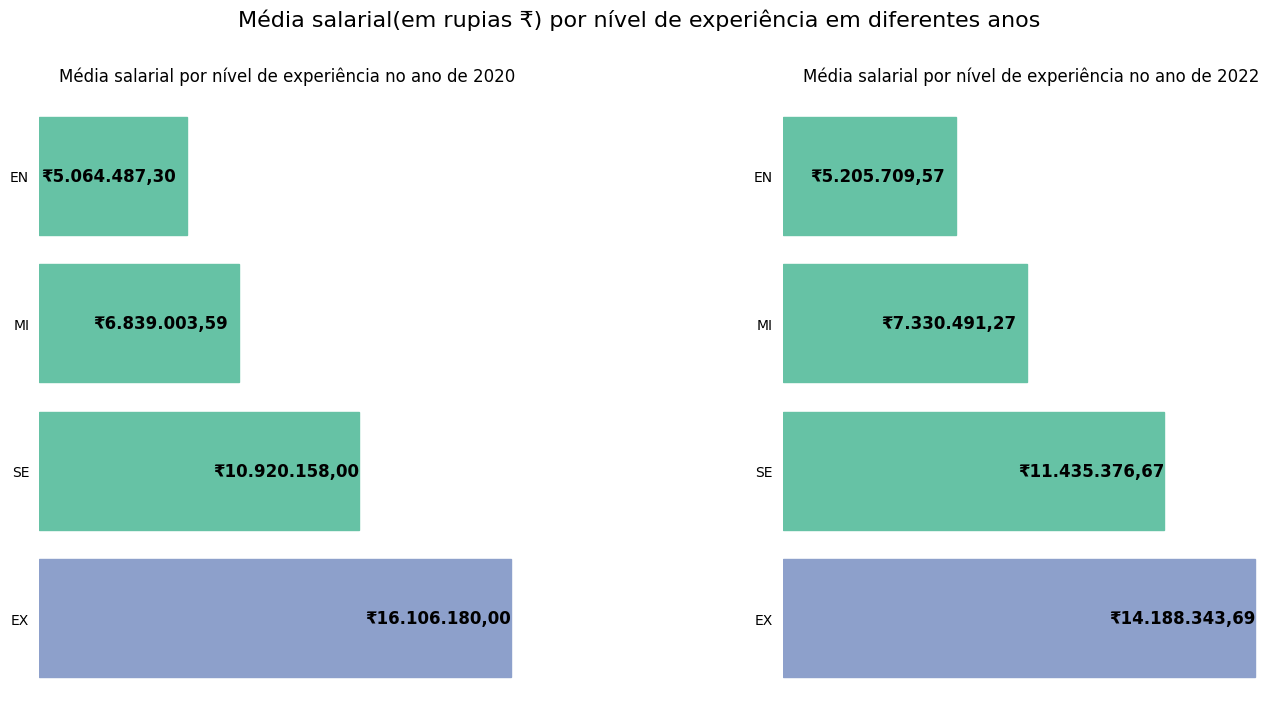

In [16]:
# Criando a figura e os subplots com tamanho e proporção ajustados
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'height_ratios': [1]})  # Largura: 15, Altura: 8, Proporção: 1:1

# Ajustando o espaçamento entre os gráficos
plt.subplots_adjust(wspace=0.5)

# Cores personalizadas para as barras
cores = plt.get_cmap('Set2').colors
cor_barras_normais = cores[0]  # Cor para as barras menores
cor_barras_maior = cores[2]  # Cor para a barra de maior valor

# Função de formatação personalizada para os rótulos das barras
def formatar_salario(x):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Gráfico 2020
barras_2020 = axes[0].barh(media_salarial_2020['Experiência'], media_salarial_2020['Salário em Rupia'])
axes[0].set_title('Média salarial por nível de experiência no ano de 2020')
axes[0].invert_yaxis()

indice_max_2020 = len(barras_2020) - 1  # Última barra (após inverter o eixo y)

# Alterando as cores das barras
for i, barra in enumerate(barras_2020):
    if i == indice_max_2020:
        barra.set_color(cor_barras_maior)  # Cor para a maior barra
    else:
        barra.set_color(cor_barras_normais)  # Cor para as barras menores

# Adicionando rótulos nas barras
axes[0].bar_label(barras_2020, labels=['₹' + formatar_salario(x) for x in media_salarial_2020['Salário em Rupia']], padding=-105, fontsize=12, fontweight='bold')

# Gráfico 2022
barras_2022 = axes[1].barh(media_salarial_2022['Experiência'], media_salarial_2022['Salário em Rupia'])
axes[1].set_title('Média salarial por nível de experiência no ano de 2022')
axes[1].invert_yaxis()

indice_max_2022 = len(barras_2022) - 1  # Última barra (após inverter o eixo y)

# Alterando as cores das barras
for i, barra in enumerate(barras_2022):
    if i == indice_max_2022:
        barra.set_color(cor_barras_maior)  # Cor para a maior barra
    else:
        barra.set_color(cor_barras_normais)  # Cor para as barras menores

# Adicionando rótulos nas barras
axes[1].bar_label(barras_2022, labels=['₹' + formatar_salario(x) for x in media_salarial_2022['Salário em Rupia']], padding=-105, fontsize=12, fontweight='bold')

# Removendo a borda (box) de ambos os gráficos
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)

# Removendo os ticks (valores) do eixo X de ambos os gráficos
for ax in axes:
    ax.set_xticks([])
    ax.tick_params(left=False, bottom=False)

fig.suptitle('Média salarial(em rupias ₹) por nível de experiência em diferentes anos', fontsize=16)

plt.show()


## Plotar a média salarial em um gráfico de barras separando em dois subplots com 2 linhas 1 coluna:
- No primeiro apresentar a média salarial pela Designação para o ano de 2022 para os top 5
- No segundo apresentar a média salarial pela Designação para o ano de 2022 para as 5 menores médias

<ipython-input-17-4b0d9031b738>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salarial_by_designation = df_2022.groupby('Designação')['Salário em Rupia'].mean().dropna().sort_values(ascending=False)
<ipython-input-17-4b0d9031b738>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_5_designacoes.index, rotation=45, ha='right')  # Rotate x-axis labels
<ipython-input-17-4b0d9031b738>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(menores_5_designacoes.index, rotation=45, ha='right')  # Rotate x-axis labels


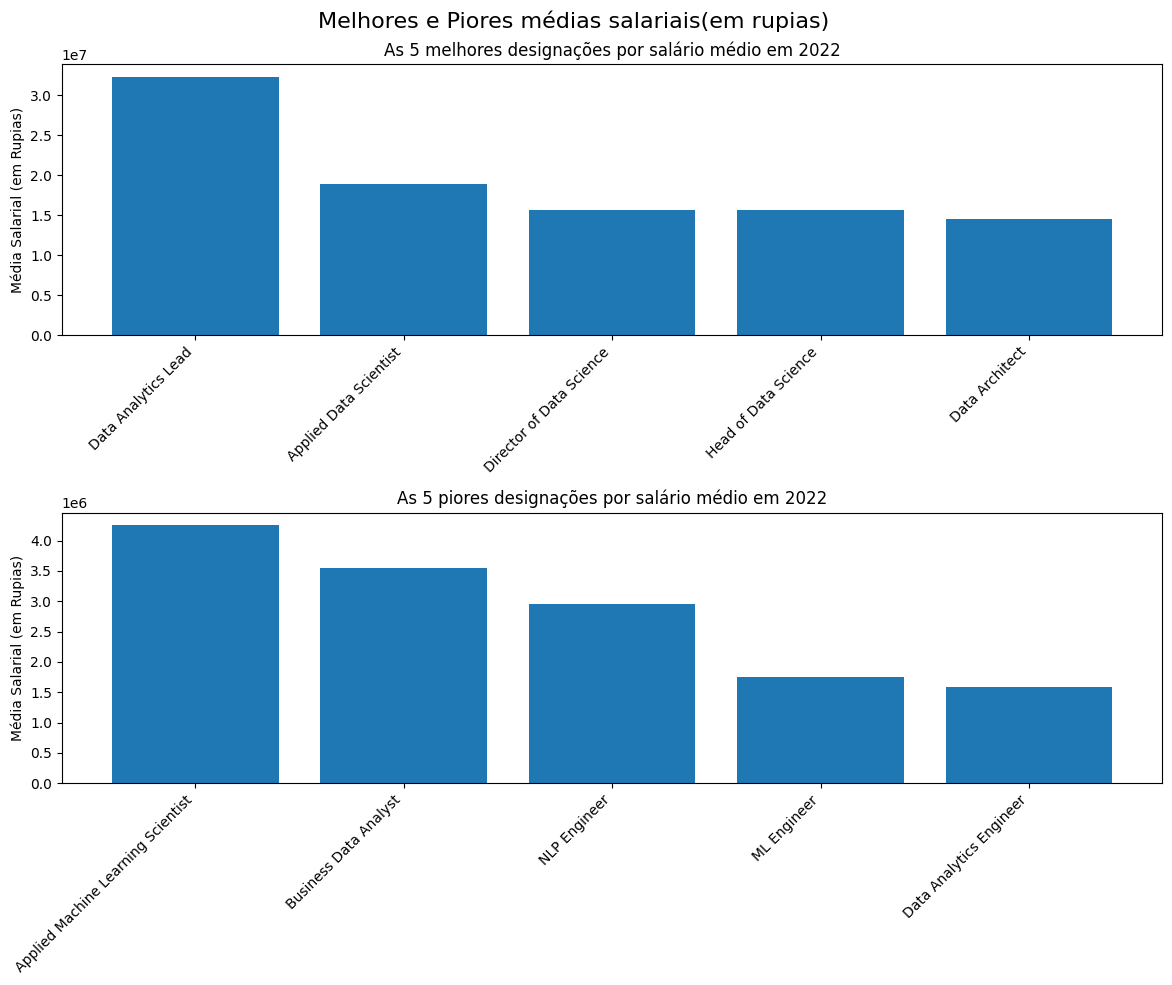

In [17]:
# Filtrando os dados para o ano de 2022
df_2022 = df[df['Ano de Trabalho'] == 2022]

# Calculando a média salarial por experiência
media_salarial_by_designation = df_2022.groupby('Designação')['Salário em Rupia'].mean().dropna().sort_values(ascending=False)

top_5_designacoes = media_salarial_by_designation.head(5)
menores_5_designacoes = media_salarial_by_designation.tail(5)

# Criando subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Adjust figsize as needed

# As 5 melhores designações em relação ao salário médio
ax1.bar(top_5_designacoes.index, top_5_designacoes.values)
ax1.set_title('As 5 melhores designações por salário médio em 2022')
ax1.set_ylabel('Média Salarial (em Rupias)')
ax1.set_xticklabels(top_5_designacoes.index, rotation=45, ha='right')  # Rotate x-axis labels

# As 5 piores designações em relação ao salário médio
ax2.bar(menores_5_designacoes.index, menores_5_designacoes.values)
ax2.set_title('As 5 piores designações por salário médio em 2022')
ax2.set_ylabel('Média Salarial (em Rupias)')
ax2.set_xticklabels(menores_5_designacoes.index, rotation=45, ha='right')  # Rotate x-axis labels

fig.suptitle('Melhores e Piores médias salariais(em rupias) ', fontsize=16)

# Ajustando o layout
plt.tight_layout()

plt.show()

## Colocando rótulo nos dados
- Para isso, vamos usar o `annotate`
    - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html
    - Para usar o annotate, vamos passar `.annotate("<Texto>",<posicao(x,y)>)`
- Podemos posicionar o annotate exatamente em cima da barra usando a posição y
- Usando o `for`, é possível aplicar o annotate para todas as barras
- Por fim, vamos usar os parâmetros do annotate para melhorar a visualização
    - ha         -> alinhamento horizontal
    - xytext     -> deslocamento x,y do texto em relação a um referencial
    - textcoords -> referencial que vamos fazer o deslocamento acima
    - fontsize   -> tamanho da fonte
    - fontweight -> colocando em negrito

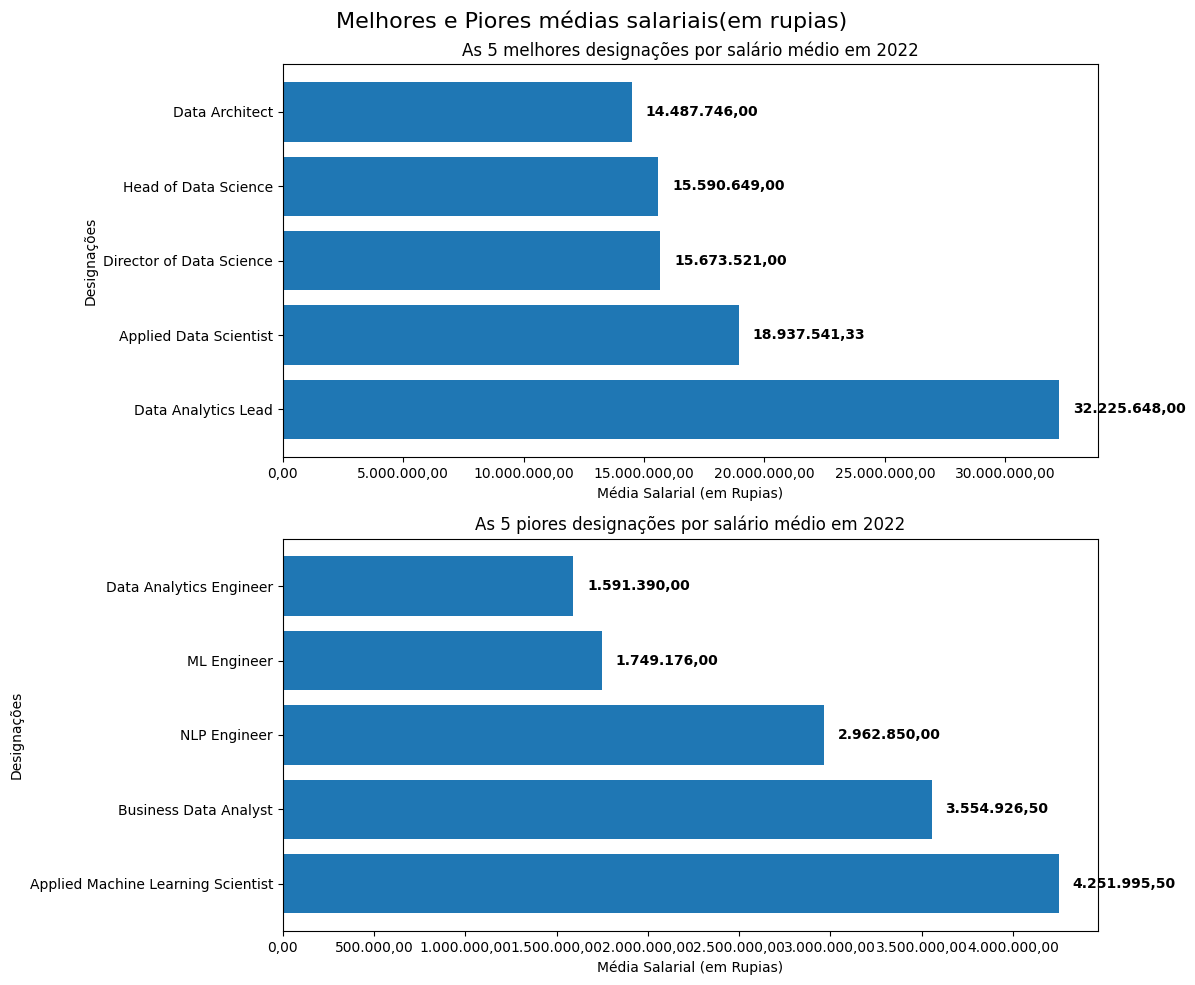

In [18]:
# Criando subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Ajustando o tamanho das figuras

# Plotando as 5 melgores designações por salário médio em 2022
ax1.barh(top_5_designacoes.index, top_5_designacoes.values)
ax1.set_title('As 5 melhores designações por salário médio em 2022')
ax1.set_xlabel('Média Salarial (em Rupias)')  # Mudando o rótulo para o eixo X
ax1.set_ylabel('Designações')  # Mudando o rótulo para o eixo Y

# Formatando o eixo X para o sistema numérico do Brasil
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

# Adicionando os rótulos para as barras (top 5 designações)
for i, v in enumerate(top_5_designacoes.values):
    ax1.annotate(f'{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Texto a ser exibido
                 xy=(v, i),  # Posição (x, y) da barra
                 xytext=(10, 0),  # Deslocamento do texto
                 textcoords='offset points',  # Referencial para o deslocamento
                 va='center',  # Alinhamento vertical
                 fontsize=10,  # Tamanho da fonte
                 fontweight='bold',  # Fonte em negrito
                 color='black')  # Cor do texto

# Plotando as 5 piores designações por salário médio em 2022
ax2.barh(menores_5_designacoes.index, menores_5_designacoes.values)
ax2.set_title('As 5 piores designações por salário médio em 2022')
ax2.set_xlabel('Média Salarial (em Rupias)')  # Mudando o rótulo para o eixo X
ax2.set_ylabel('Designações')  # Mudando o rótulo para o eixo Y

# Formatando o eixo X para o sistema numérico do Brasil
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

# Adicionando os rótulos para as barras (bottom 5 designações)
for i, v in enumerate(menores_5_designacoes.values):
    ax2.annotate(f'{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Texto a ser exibido
                 xy=(v, i),  # Posição (x, y) da barra
                 xytext=(10, 0),  # Deslocamento do texto
                 textcoords='offset points',  # Referencial para o deslocamento
                 va='center',  # Alinhamento vertical
                 fontsize=10,  # Tamanho da fonte
                 fontweight='bold',  # Fonte em negrito
                 color='black')  # Cor do texto

fig.suptitle('Melhores e Piores médias salariais(em rupias) ', fontsize=16)

# Ajustando o layout para que os gráficos não sobreponham
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## Ajustando o eixo y para melhorar a visualização dos rótulos
- O `.set_yticks` vai permitir que alterar o intervalo do eixo y
- O `.yaxis.set_visible` permite que os valores do eixo y não fiquem visíveis

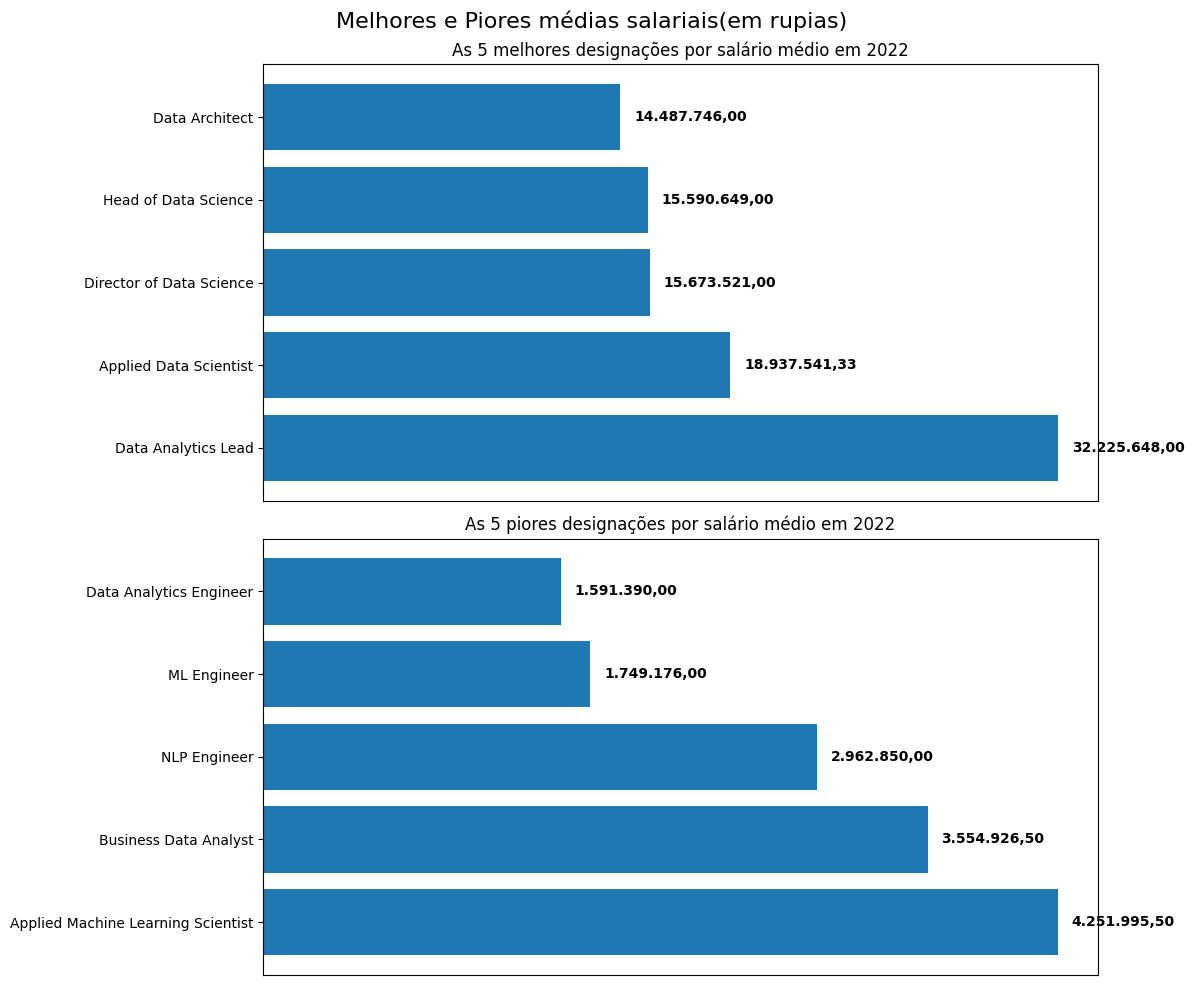

In [19]:
# Criando subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Ajustando o tamanho das figuras

# Plotando as 5 melhores designações por salário médio em 2022
ax1.barh(top_5_designacoes.index, top_5_designacoes.values)
ax1.set_title('As 5 melhores designações por salário médio em 2022')
ax1.set_xlabel('Média Salarial (em Rupias)')  # Mudando o rótulo para o eixo X

# Função de formatação personalizada para os rótulos das barras
def formatar_salario(x):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Adicionando os rótulos para as barras (top 5 designações)
for i, v in enumerate(top_5_designacoes.values):
    ax1.annotate(f'{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Texto a ser exibido
                 xy=(v, i),  # Posição (x, y) da barra
                 xytext=(10, 0),  # Deslocamento do texto
                 textcoords='offset points',  # Referencial para o deslocamento
                 va='center',  # Alinhamento vertical
                 fontsize=10,  # Tamanho da fonte
                 fontweight='bold',  # Fonte em negrito
                 color='black')  # Cor do texto

# Ocultando os valores do eixo X
ax1.xaxis.set_visible(False)

# Plotando as 5 piores designações por salário médio em 2022
ax2.barh(menores_5_designacoes.index, menores_5_designacoes.values)
ax2.set_title('As 5 piores designações por salário médio em 2022')
ax2.set_xlabel('Média Salarial (em Rupias)')  # Mudando o rótulo para o eixo X

# Adicionando os rótulos para as barras (bottom 5 designações)
for i, v in enumerate(menores_5_designacoes.values):
    ax2.annotate(f'{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Texto a ser exibido
                 xy=(v, i),  # Posição (x, y) da barra
                 xytext=(10, 0),  # Deslocamento do texto
                 textcoords='offset points',  # Referencial para o deslocamento
                 va='center',  # Alinhamento vertical
                 fontsize=10,  # Tamanho da fonte
                 fontweight='bold',  # Fonte em negrito
                 color='black')  # Cor do texto

# Ocultando os valores do eixo X
ax2.xaxis.set_visible(False)

fig.suptitle('Melhores e Piores médias salariais(em rupias) ', fontsize=16)

# Ajustando o layout para que os gráficos não sobreponham
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## Retirando bordas do gráfico
- Usando o `.spines[].set_visible(False)` é possível retirar as bordas de um gráfico

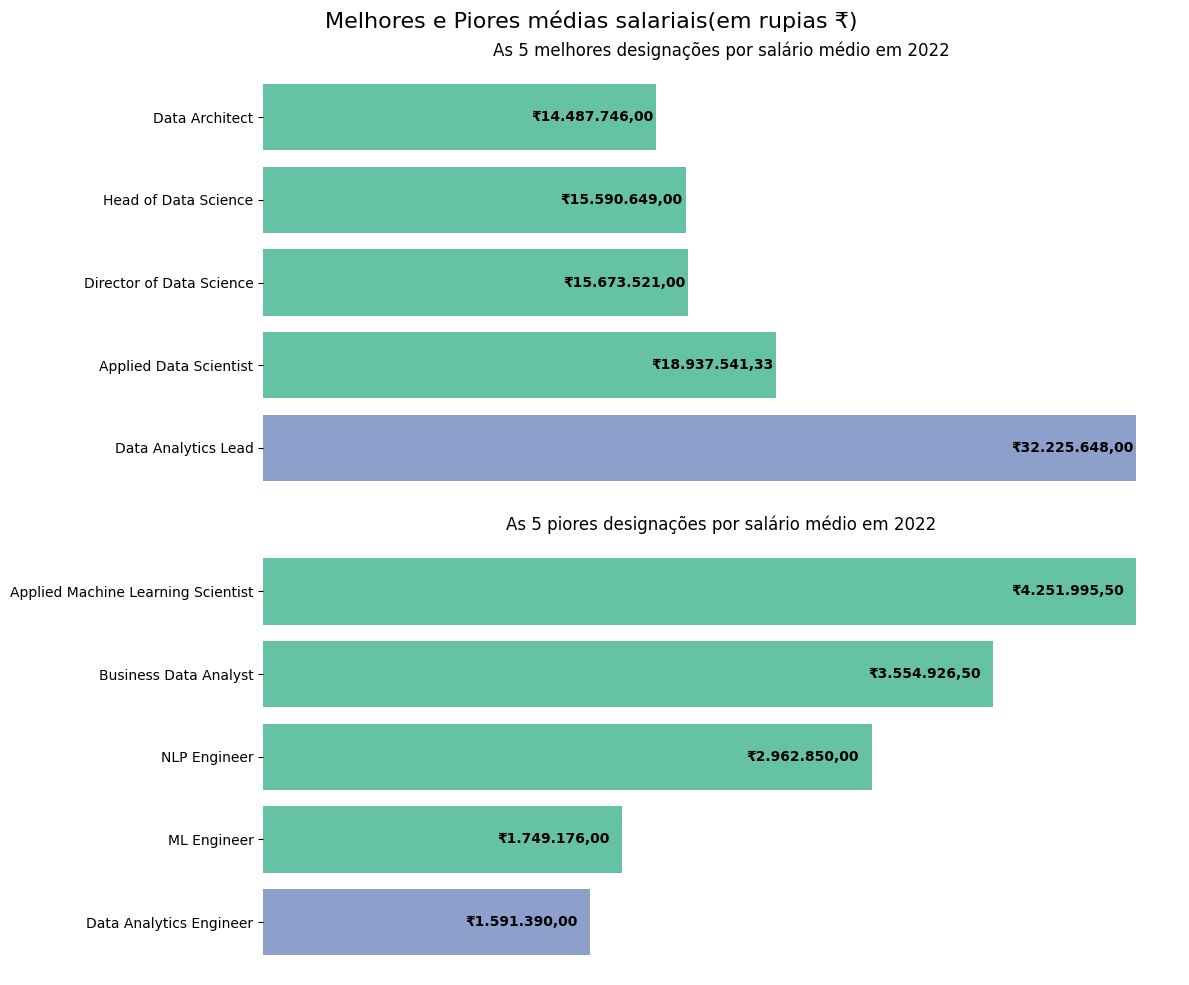

In [20]:
import matplotlib.pyplot as plt

# Gerar as cores da paleta 'Set2'
cores = plt.cm.Set2.colors

# Criando subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Ajustando o tamanho das figuras

# Plotando as 5 melhores designações por salário médio em 2022
for i, v in enumerate(top_5_designacoes.values):
    color = cores[0] if i > 0 else cores[2]  # Usando a cor 0 para as primeiras barras e 2 para a última
    ax1.barh(top_5_designacoes.index[i], v, color=color)

ax1.set_title('As 5 melhores designações por salário médio em 2022')
ax1.set_xlabel('Média Salarial (em Rupias ₹)')  # Mudando o rótulo para o eixo X

# Função de formatação personalizada para os rótulos das barras
def formatar_salario(x):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Adicionando os rótulos para as barras (top 5 designações)
for i, v in enumerate(top_5_designacoes.values):
    ax1.annotate(f'₹{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Texto a ser exibido
                 xy=(v, i),  # Posição (x, y) da barra
                 xytext=(-90, 0),  # Deslocamento do texto
                 textcoords='offset points',  # Referencial para o deslocamento
                 va='center',  # Alinhamento vertical
                 fontsize=10,  # Tamanho da fonte
                 fontweight='bold',  # Fonte em negrito
                 color='black')  # Cor do texto

# Ocultando os valores do eixo X
ax1.xaxis.set_visible(False)

# Plotando as 5 piores designações por salário médio em 2022
for i, v in enumerate(menores_5_designacoes.values):
    color = cores[0] if i < len(menores_5_designacoes) - 1 else cores[2]  # Usando a cor 0 para as primeiras barras e 2 para a última
    ax2.barh(menores_5_designacoes.index[i], v, color=color)

ax2.set_title('As 5 piores designações por salário médio em 2022')
ax2.set_xlabel('Média Salarial (em Rupias)')  # Mudando o rótulo para o eixo X

# Adicionando os rótulos para as barras (bottom 5 designações)
for i, v in enumerate(menores_5_designacoes.values):
    ax2.annotate(f'₹{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Texto a ser exibido
                 xy=(v, i),  # Posição (x, y) da barra
                 xytext=(-90, 0),  # Deslocamento do texto
                 textcoords='offset points',  # Referencial para o deslocamento
                 va='center',  # Alinhamento vertical
                 fontsize=10,  # Tamanho da fonte
                 fontweight='bold',  # Fonte em negrito
                 color='black')  # Cor do texto

ax2.invert_yaxis()

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_visible(False)

# Ocultando os valores do eixo X
ax2.xaxis.set_visible(False)

fig.suptitle('Melhores e Piores médias salariais(em rupias ₹) ', fontsize=16)

# Ajustando o layout para que os gráficos não sobreponham
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## Conclusão
Com base nos gráficos apresentados, qual a conclusão que se pode chegar?

- Analisando os gráficos gerados, podemos observar as seguintes tendências:
Existe uma correlação positiva entre o nível de experiência e o salário médio.

- Em ambos os anos analisados (2020 e 2022), os profissionais com maior experiência ("EX") tendem a receber
salários significativamente mais altos em comparação com os outros níveis de experiência. Essa tendência
se mantém consistente ao longo dos dois anos.
Podemos ver que a média salarial do profissionais com maior experiência ("EX") diminuiu de 2020 para 2022, enquantos o resto aumentou.

- A disparidade salarial entre diferentes designações é evidente, em 2022, as 5 melhores designações demonstram salários médios consideravelmente superiores às 5 piores.
Isso sugere que a posição ocupada dentro da empresa influencia diretamente na remuneração.

- Em resumo, a experiência profissional é um fator crucial na determinação do salário, e a designação dentro da
empresa desempenha um papel importante na variação salarial.

## Desafio
### Elaborar nuvem de palavras dos cargos mais bem remunerados em Ciência de Dados. Utilize a função WorldClound(), verifique todos os parâmetros necessários para sua utilização


<ipython-input-23-b059ec497804>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salarial_por_designacao_geral = df.groupby('Designação')['Salário em Rupia'].mean().sort_values(ascending=False).head(15)


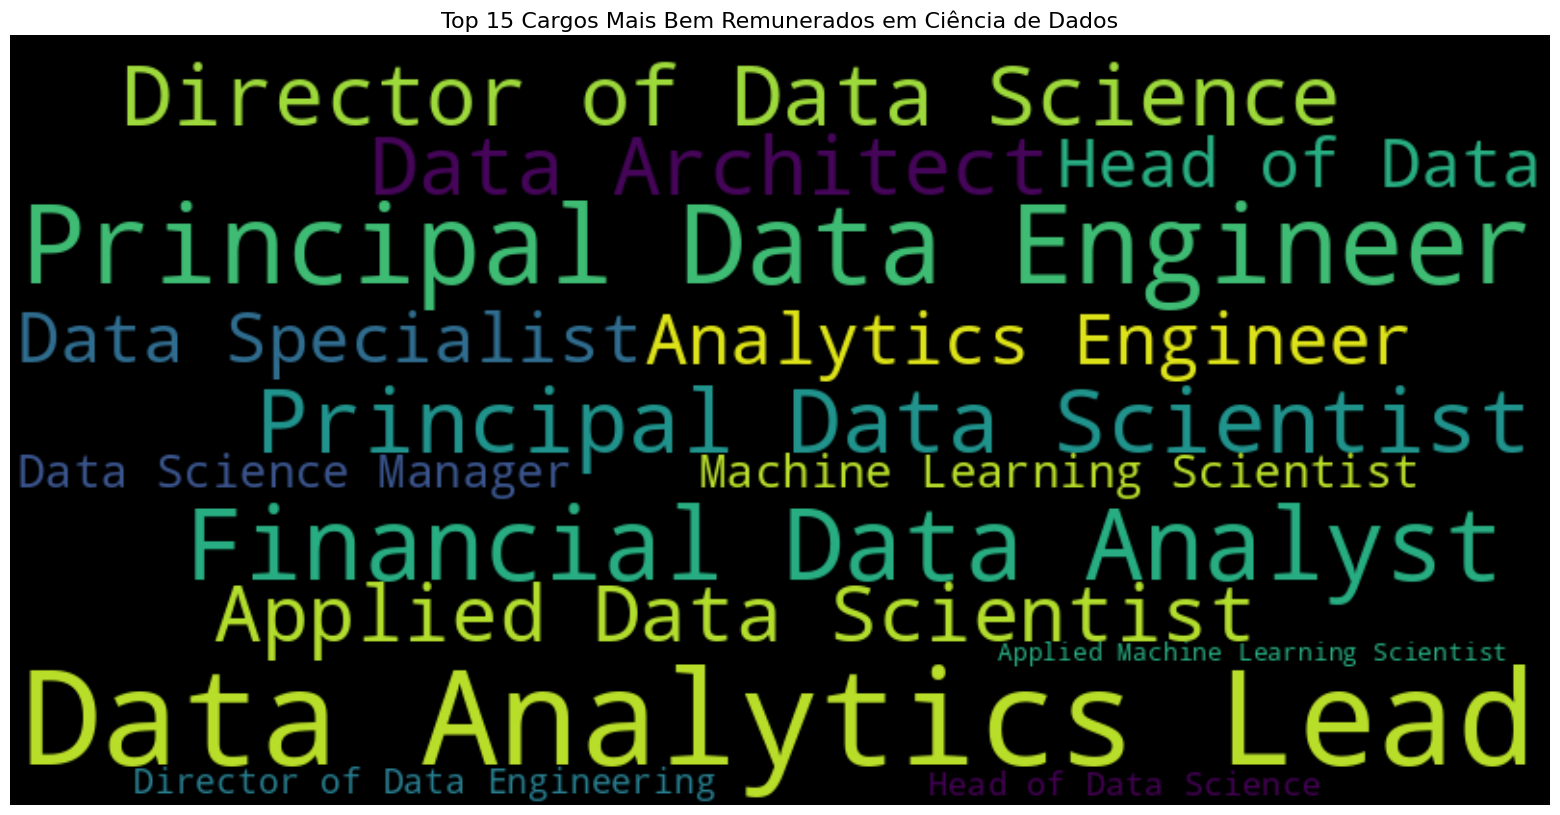

In [23]:
# Agrupar as médias Salariais por Designação
media_salarial_por_designacao_geral = df.groupby('Designação')['Salário em Rupia'].mean().sort_values(ascending=False).head(15)

# Gerar a nuvem de palavras
nuvem = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="viridis",
    prefer_horizontal=0.9,
    max_font_size=100,
).generate_from_frequencies(media_salarial_por_designacao_geral.to_dict())

# Plotar a nuvem de palavras
plt.figure(figsize=(20, 10))
plt.imshow(nuvem, interpolation="bilinear")
plt.axis("off")
plt.title("Top 15 Cargos Mais Bem Remunerados em Ciência de Dados", fontsize=16)
plt.show()


